# 风险管理作业6
-----
2501210025 叶云鹏

## (一) 整理CDS合约的保费计算原理的数学方法



### 部分1: 定义关键变量和假设

1. **CDS合约基本参数**：
   - 名义本金（Notional Principal）：记为 $ EAD $（违约风险暴露）
   - 利差（Spread）：记为 $ S $（年化百分比形式），为待求保费率
   - 回收率（Recovery Rate）：记为 $ R $（$ 0 \leq R \leq 1 $）
   - 违约损失率（Loss Given Default）：$ LGD = 1 - R $
   - 无风险折现因子：$ DF(t) = e^{-r t} $（连续复利，$ r $ 为无风险利率）
   - 生存概率曲线：$ Q(t) $（风险中性测度下，参考实体在 $ t $ 前未违约的概率）
   - 区间违约概率：$ PD(t_{j-1}, t_j) = Q(t_{j-1}) - Q(t_j) $
   - 保费支付时间点：$ t_1, t_2, \dots, t_N $（通常为季度）
   - 违约监测区间：$ t_0 = 0, t_1, \dots, t_M $，违约假设发生在区间中点  
     $ \tau_j = \frac{t_{j-1} + t_j}{2} $
   - 计期因子：$ \Delta(t_i) = t_i - t_{i-1} $（年化）

2. **核心假设**：
   - 合约初始价值为零（公平定价）
   - 使用**风险中性测度**，所有预期在无风险利率下折现
   - 暂忽略应计保费（Accrued Premium）以简化推导

---

### 部分2: 推导赔付端（Default Leg）的现值

赔付端 = 卖方在违约发生时支付赔偿的**预期现值**

1. 在区间 $ [t_{j-1}, t_j] $ 内：
   - 赔偿金额：$ LGD \times EAD = (1 - R) \times EAD $
   - 违约概率：$ Q(t_{j-1}) - Q(t_j) $
   - 赔偿时间：$ \tau_j $，折现因子：$ DF(\tau_j) $

2. 单区间的预期赔偿现值：
  $$
   (Q(t_{j-1}) - Q(t_j)) \times (1 - R) \times EAD \times DF(\tau_j)
  $$

3. 总赔付端现值：
  $$
   PV(\text{Default Leg}) = EAD \times (1 - R) \times \sum_{j=1}^{M} (Q(t_{j-1}) - Q(t_j)) \cdot DF(\tau_j)
  $$

---

### 部分3: 推导保费端（Premium Leg）的现值

保费端 = 买方在未违约时支付保费的**预期现值**

1. 在支付日 $ t_i $：
   - 支付条件：存活至 $ t_i $，概率为 $ Q(t_i) $
   - 支付金额：$ S \times \Delta(t_i) \times EAD $
   - 折现因子：$ DF(t_i) $

2. 单支付日的预期保费现值：
  $$
   Q(t_i) \times S \times \Delta(t_i) \times EAD \times DF(t_i)
  $$

3. 总保费端现值：
  $$
   PV(\text{Premium Leg}) = S \times EAD \times \sum_{i=1}^{N} \Delta(t_i) \cdot Q(t_i) \cdot DF(t_i)
  $$

4. 定义**风险中性年金因子（RPV01）**：
  $$
   RPV01 = \sum_{i=1}^{N} \Delta(t_i) \cdot Q(t_i) \cdot DF(t_i)
  $$
   则：
  $$
   PV(\text{Premium Leg}) = S \times EAD \times RPV01
  $$

---

### 部分4: 建立平衡方程并求解公平利差 $ S $

1. **无套利原则**：初始合约价值为零
  $$
   PV(\text{Premium Leg}) = PV(\text{Default Leg})
  $$

2. 代入现值公式：
  $$
   S \times EAD \times RPV01 = EAD \times (1 - R) \times \sum_{j=1}^{M} (Q(t_{j-1}) - Q(t_j)) \cdot DF(\tau_j)
  $$

3. 消去 $ EAD $（$ EAD \neq 0 $）：
  $$
   S \times RPV01 = (1 - R) \times \sum_{j=1}^{M} (Q(t_{j-1}) - Q(t_j)) \cdot DF(\tau_j)
  $$

4. **求解公平利差 $ S $**：
  $$
   \boxed{
   S = \frac{(1 - R) \times \sum_{j=1}^{M} (Q(t_{j-1}) - Q(t_j)) \cdot DF(\tau_j)}{RPV01}}
  $$

> **解释**：  
> 分子 = 预期违约损失的现值（风险中性）  
> 分母 = 预期保费支付期的现值（风险调整后）

---

### 部分5: 风险中性概率 vs. 历史实际概率

| 维度 | 风险中性概率（CDS定价用） | 历史实际概率（银行风控用） |
|------|--------------------------|----------------------------|
| 来源 | 市场CDS报价反推 $ Q(t) $ | 历史违约数据统计 |
| 包含内容 | 实际违约概率 + 风险溢价 | 仅实际违约概率 |
| 大小关系 | $ PD_{\text{风险中性}} > PD_{\text{历史}} $ | 较低 |
| 用途 | 市场定价、套利 | 预期损失 $ EL = PD \times LGD \times EAD $ |

> **结论**：若用历史 $ PD $ 替代风险中性 $ PD $，将**低估**市场利差 $ S $

---


**最终答案**：
$$
\boxed{
S = \dfrac{(1 - R) \sum_{j=1}^{M} \left[ Q(t_{j-1}) - Q(t_j) \right] DF(\tau_j)}{ \sum_{i=1}^{N} \Delta(t_i) Q(t_i) DF(t_i) }}
$$

> 即：**公平CDS利差 = 预期违约损失现值 ÷ 风险调整后年金现值

## (二)
假设两个公司的收益率$R_1$和$R_2$服从二维正态分布，其中边缘分布为标准正态分布，两个随机变量的相关系数为$-1<\rho<1$。定义当收益率$R_i$低于-1.535时违约发生，记违约的示性算子
$$
d_1 = I_{\{V_1 < -1.535\}},d_2 = I_{\{V_1 < -1.535\}}
$$
$d_1$和$d_2$的相关系数为$R(\rho)$，这里的$R(\rho)$为$\rho$的函数，试通过数值方法，或随机模拟的办法，绘制函数$R(\rho),\rho \in (0,1)$

违约相关系数 R(ρ) 表格（ρ ∈ (-1,1)，不含端点）：


,joint_prob,R(rho)
rho,,
-0.999000,0.000000,-0.066544
-0.988909,0.000000,-0.066544
-0.978818,0.000000,-0.066544
-0.968727,0.000000,-0.066544
-0.958636,0.000000,-0.066544
...,...,...
0.958636,0.048366,0.760235
0.968727,0.050182,0.791278
0.978818,0.052331,0.828023


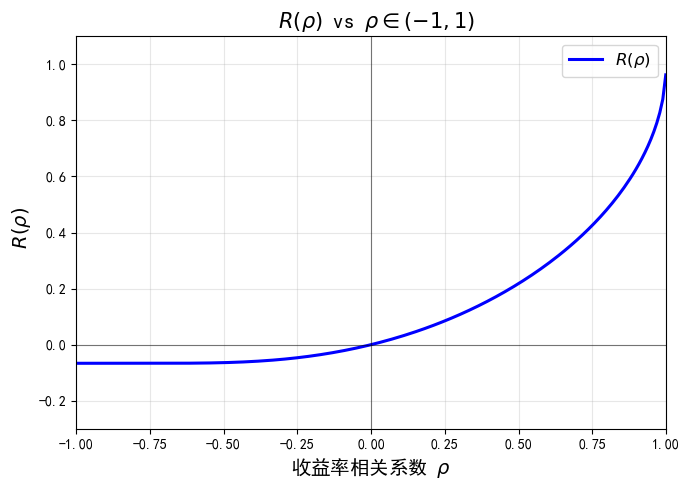

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
import warnings
warnings.filterwarnings('ignore')

# plt.rcParams['font.sans-serif'] = ['Hiragino Sans GB']  # 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签

plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# ==================== 参数设置 ====================
a = -1.535
p = norm.cdf(a)  # 单个违约概率 ≈ 0.0623
rho_values = np.linspace(-0.999, 0.999, 199)  # -1 到 1，不包含端点，共 199 个点
n_rho = len(rho_values)

# ==================== 向量化计算联合概率 ====================
mean = np.array([0, 0])
joint_probs = np.zeros(n_rho)

for i, rho in enumerate(rho_values):
    cov = [[1, rho], [rho, 1]]
    mvn = multivariate_normal(mean=mean, cov=cov)
    joint_probs[i] = mvn.cdf([a, a])

# ==================== 计算相关系数 R(ρ) ====================
numerator = joint_probs - p**2
denominator = p * (1 - p)
R_rho = numerator / denominator

# ==================== 构建 DataFrame ====================
df = pd.DataFrame({
    'rho': rho_values,
    'joint_prob': joint_probs,
    'R(rho)': R_rho
}).round(6)

df.set_index('rho', inplace=True)

# ==================== 使用 display 显示完整表格 ====================
print("违约相关系数 R(ρ) 表格（ρ ∈ (-1,1)，不含端点）：")
display(df)

# ==================== 绘图 ====================
plt.figure(figsize=(7, 5))
plt.plot(df.index, df['R(rho)'], 'b-', linewidth=2.2, label=r'$R(\rho)$')
plt.axhline(0, color='k', linewidth=0.8, alpha=0.5)
plt.axvline(0, color='k', linewidth=0.8, alpha=0.5)


plt.xlabel(r'收益率相关系数 $\rho$', fontsize=14)
plt.ylabel(r' $R(\rho)$', fontsize=14)
plt.title(r' $R(\rho)$ vs $\rho \in (-1,1)$', fontsize=15)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim(-1, 1)
plt.ylim(-0.3, 1.1)


plt.tight_layout()
plt.show()
